In [1]:
import pandas as pd
import numpy as np
import re

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
df_train = pd.read_csv("data/Corona_NLP_train.csv", encoding= 'latin-1')
df_test = pd.read_csv("data/Corona_NLP_test.csv", encoding= 'latin-1')


In [33]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df_train.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df_test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [7]:
df_train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [8]:
def label_sentiment(sentiment):
    if sentiment == "Extremely Negative":
        return 0
    elif sentiment == "Extremely Positive":
        return 2
    elif sentiment == "Negative":
        return 0
    elif sentiment == "Positive":
        return 2
    else:
        return 1

In [9]:
df_train.Sentiment = df_train.Sentiment.apply(lambda x: label_sentiment(x))
df_test.Sentiment = df_test.Sentiment.apply(lambda x: label_sentiment(x))

In [10]:
df_train.Sentiment.value_counts()

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64

In [11]:
df_test.Sentiment.value_counts()    

0    1633
2    1546
1     619
Name: Sentiment, dtype: int64

`0: Negative Tweets`

`1: Neutral Tweets`

`2: Positive Tweets`

2    18046
0    15398
1     7713
Name: Sentiment, dtype: int64


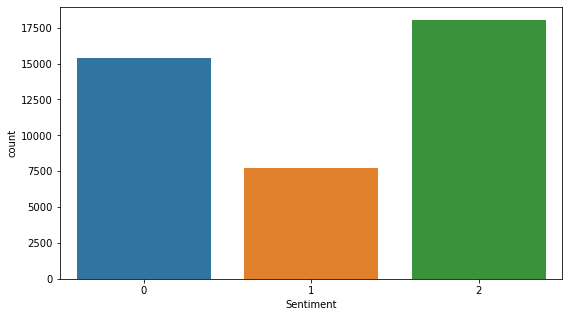

In [12]:
print(df_train.Sentiment.value_counts())
plt.figure(figsize=(9,5))
sns.countplot(x="Sentiment", data=df_train)
plt.show()

In [13]:
# Cleaning Data

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# Apply functions on OriginalTweet
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : remove_url(x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : remove_emoji(x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : decontraction(x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : seperate_alphanumeric(x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : unique_char(cont_rep_char,x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : char(x))
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lambda x : x.lower())

In [14]:
# Cleaning test data as well

df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : remove_url(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : remove_emoji(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : decontraction(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : seperate_alphanumeric(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : unique_char(cont_rep_char,x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : char(x))
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lambda x : x.lower())

In [15]:
df_train.OriginalTweet.head()
    

0                 menyrbie phil gahan chrisitv and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: OriginalTweet, dtype: object

In [16]:
df_test.OriginalTweet.head()

0    trending new yorkers encounter empty supermark...
1    when i could not find hand sanitizer at fred m...
2    find out how you can protect yourself and love...
3    panic buying hits newyork city as anxious shop...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: OriginalTweet, dtype: object

In [17]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,trending new yorkers encounter empty supermark...,0
1,2,44954,"Seattle, WA",02-03-2020,when i could not find hand sanitizer at fred m...,2
2,3,44955,NaN,02-03-2020,find out how you can protect yourself and love...,2
3,4,44956,Chicagoland,02-03-2020,panic buying hits newyork city as anxious shop...,0
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronavirus...,1


In [18]:
Positive = df_train[df_train.Sentiment==2].OriginalTweet
Negative = df_train[df_train.Sentiment==0].OriginalTweet
Neutral = df_train[df_train.Sentiment==1].OriginalTweet

In [19]:
len(Positive), len(Negative), len(Neutral)

(18046, 15398, 7713)

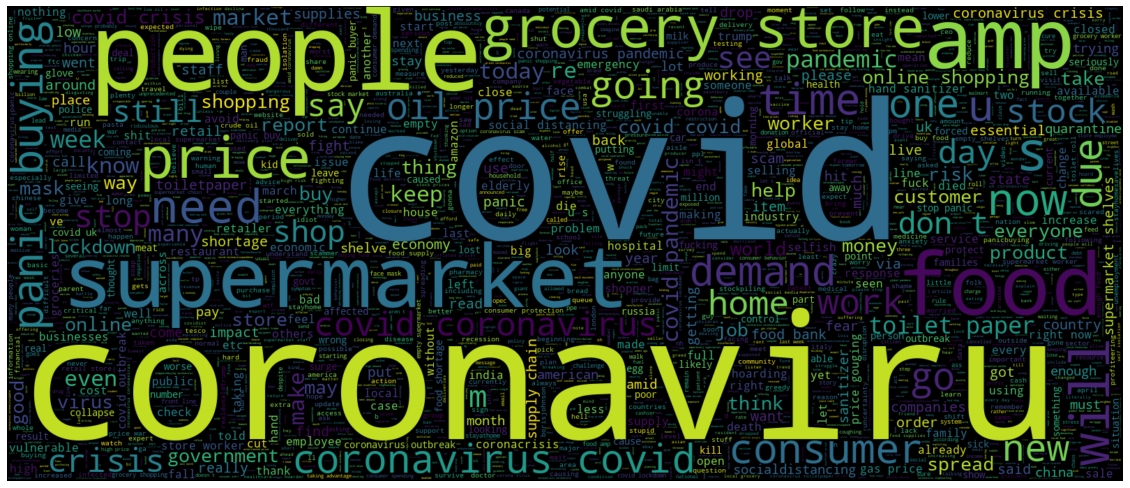

In [85]:
# Worldcould of  Negative Tweets 
plt.figure(figsize = (20,20)) 
wordcould = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(Negative))
plt.imshow(wordcould,interpolation = 'bilinear')
plt.axis("off")
plt.grid(None)

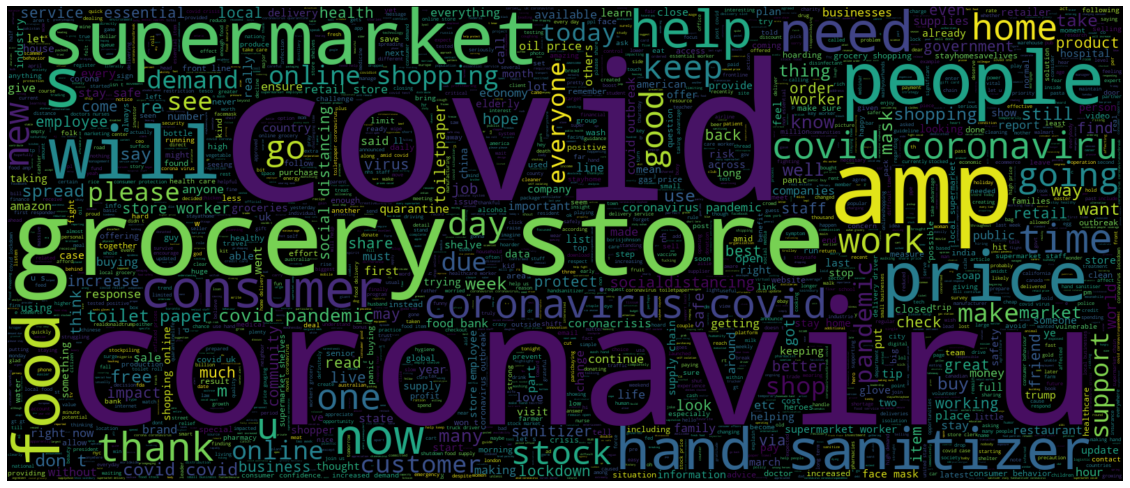

In [86]:
# Worldcould of Positive Tweets 
plt.figure(figsize = (20,20)) 
wordcould = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(Positive))
plt.imshow(wordcould,interpolation = 'bilinear')
plt.axis("off")
plt.grid(None)

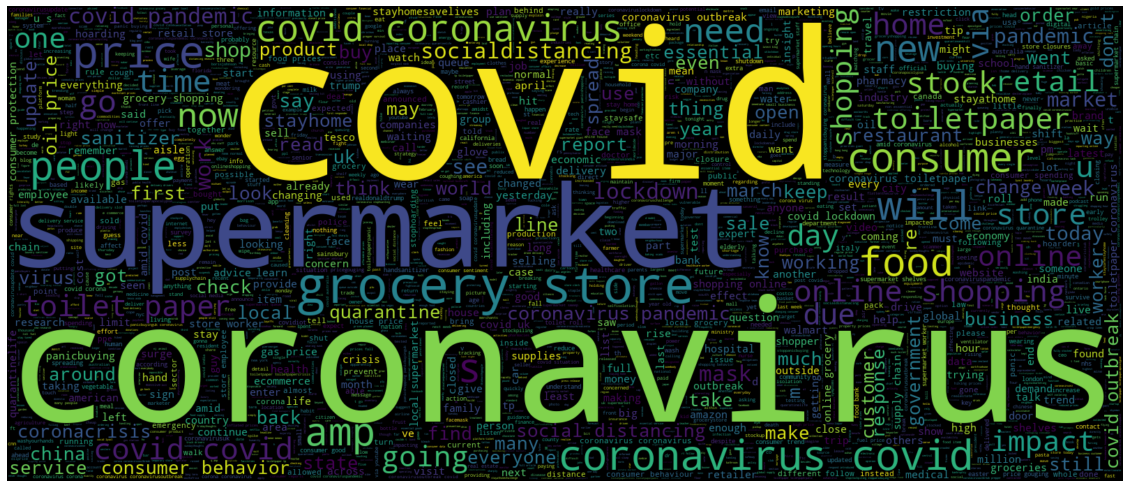

In [87]:
# Worldcould of Neutral Tweets 
plt.figure(figsize = (20,20)) 
wordcould = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(Neutral))
plt.imshow(wordcould,interpolation = 'bilinear')
plt.axis("off")
plt.grid(None)

In [20]:
X_train = df_train["OriginalTweet"]
y_train = df_train["Sentiment"]
X_test = df_test["OriginalTweet"]
y_test = df_test["Sentiment"]

In [21]:
print('Shape of X_train : ' , X_train.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (41157,)
Shape of y_train :  (41157,)
Shape of X_test :  (3798,)
Shape of y_test :  (3798,)


In [22]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model


from sklearn.metrics import classification_report

In [23]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [24]:
# Tokenize Texts
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [25]:
# convert tokenized texts into same padding size
maxlen = 200
embed_size = 128 
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [26]:
# Create Model  
inp = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(inp)
x   =  LSTM(60, return_sequences=True,name='lstm_layer')(x)
x   =  GlobalMaxPool1D()(x)
x   =  Dense(64, activation="relu")(x)
x   =  Dropout(0.2)(x)
x   =  Dense(3, activation="softmax")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.fit(X_train_final,y_train, epochs=2,validation_data=(X_test_final,y_test))

Epoch 1/2
1287/1287 [==============================] - 122s 95ms/step - loss: 0.5619 - accuracy: 0.7758 - val_loss: 0.4262 - val_accuracy: 0.8520
Epoch 2/2
1287/1287 [==============================] - 123s 95ms/step - loss: 0.2868 - accuracy: 0.9053 - val_loss: 0.3748 - val_accuracy: 0.8657


In [31]:
# Evaluate
model.evaluate(X_test_final,y_test)

119/119 [==============================] - 2s 20ms/step - loss: 0.3748 - accuracy: 0.8657


[0.3748476803302765, 0.8657187819480896]

In [28]:
# Predict test
lstm_pred = np.round(model.predict(X_test_final))

In [30]:
# Precision , Recall , F1-score
cr = classification_report(y_test,lstm_pred)
print(cr);

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1633
           1       0.91      0.76      0.83       619
           2       0.84      0.91      0.87      1546

   micro avg       0.88      0.85      0.87      3798
   macro avg       0.89      0.83      0.86      3798
weighted avg       0.88      0.85      0.86      3798
 samples avg       0.85      0.85      0.85      3798



d:\ML\Projects\twitter-disaster-tweets-classification\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
